# Analyzing COVID RNA Sequences in Python

# Introduction 

Ribonucleic acid (RNA) is  a molecule that acts as the "source code" for viruses like the coronavirus that causes COVID-19. RNA is a single stranded molecule made up of nucelotides: adenine, cytosiine, uracil and guanine.

This project will use a dataset from the National Institues of Health (NIH) available [here](https://drive.google.com/file/d/1S2ZDjdRkY78kZxBtc9YNUh0mByTHXQ23/view). The dataset is comprised of RNA sequences including the original reference sequence that was first identified in China at the very beginning of the pandemic. 

This project will utilize open-source tools: pandas, Biopython and IPython.


In [4]:
import pandas as pd

metadata = pd.read_csv("ncbi_datasets.csv")

/var/folders/60/skzltjy12xb20cwsytzzlphh0000gn/T/ipykernel_50819/423091332.py:3: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv("ncbi_datasets.csv")


In [5]:
metadata.head()

,Nucleotide Accession,Species Taxonomy Id,Species Name,Virus Genus,Virus Family,Isolate Name,Nucleotide Length,Sequence Type,Nuc Completeness,Geo Location,US State,Host Name,Host Taxonomy ID,Collection Date,BioProject,BioSample
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12,PRJNA485481,NaN
1,OM487257.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-220129247957/2021,29815,GenBank,complete,North America; USA,NaN,NaN,9606,2021-12-23,PRJNA614995,SAMN25559487
2,OM403304.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/VM20001061-2/2020,29870,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
3,OM403303.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/Original/2020,29851,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
4,OM401120.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-211112790633/2021,29712,GenBank,complete,North America; USA,NaN,NaN,9606,2021-09-25,PRJNA614995,SAMN23427251


The table above contains interesting data points including Nucleotide Length (length of the RNA sequence)

In [6]:
metadata.shape

(847791, 16)

We want to narrow the amount of metadata for sequences we have (847,791). We'll turn the `Collection Date` column into an actual Date by converting the data type.

In [7]:
metadata["Collection Date"] = pd.to_datetime(metadata["Collection Date"])

In [8]:
metadata.dtypes

Nucleotide Accession            object
Species Taxonomy Id              int64
Species Name                    object
Virus Genus                     object
Virus Family                    object
Isolate Name                    object
Nucleotide Length                int64
Sequence Type                   object
Nuc Completeness                object
Geo Location                    object
US State                       float64
Host Name                      float64
Host Taxonomy ID                 int64
Collection Date         datetime64[ns]
BioProject                      object
BioSample                       object
dtype: object

In [11]:
metadata.columns = [c.lower().replace(" ", "_") for c in metadata.columns] #changing case of column names and removing spaces for underscores

In [12]:
metadata

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN
1,OM487257.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-220129247957/2021,29815,GenBank,complete,North America; USA,NaN,NaN,9606,2021-12-23,PRJNA614995,SAMN25559487
2,OM403304.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/VM20001061-2/2020,29870,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
3,OM403303.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/Original/2020,29851,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN
4,OM401120.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-211112790633/2021,29712,GenBank,complete,North America; USA,NaN,NaN,9606,2021-09-25,PRJNA614995,SAMN23427251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847786,HG996822.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,a925,29903,GenBank,complete,Europe; United Kingdom:Oxford,NaN,NaN,9606,2020-11-27,PRJEB43319,SAMEA8246553
847787,HG996820.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,a935,29903,GenBank,complete,Europe; United Kingdom:Oxford,NaN,NaN,9606,2020-12-10,PRJEB43319,SAMEA8246563
847788,HG996813.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,a929,29903,GenBank,complete,Europe; United Kingdom:Oxford,NaN,NaN,9606,2020-12-01,PRJEB43319,SAMEA8246557
847789,HG996715.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,a850,29897,GenBank,complete,Europe; United Kingdom:Oxford,NaN,NaN,9606,2020-11-29,PRJEB43319,SAMEA8246478


## Exploratory Data Analysis

Let's conduct exploratory data analysis (EDA) on the metadata to answer the following questions: 

* When was the first COVID RNA sequence collected on each continent?
* How many sequences were collected on each continent?
* How long are the shortest and longest sequences? 
* How many samples were collected by month? Explore possible trends

In [13]:
metadata["continent"] = metadata["geo_location"].str.replace(";.+", "", regex=True)

In [14]:
metadata

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia
1,OM487257.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-220129247957/2021,29815,GenBank,complete,North America; USA,NaN,NaN,9606,2021-12-23,PRJNA614995,SAMN25559487,North America
2,OM403304.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/VM20001061-2/2020,29870,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN,Asia
3,OM403303.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/HKG/Original/2020,29851,GenBank,complete,Asia; Hong Kong,NaN,NaN,9606,2020-01-23,NaN,NaN,Asia
4,OM401120.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/UT-UPHL-211112790633/2021,29712,GenBank,complete,North America; USA,NaN,NaN,9606,2021-09-25,PRJNA614995,SAMN23427251,North America
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847786,HG996822.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,a925,29903,GenBank,complete,Europe; United Kingdom:Oxford,NaN,NaN,9606,2020-11-27,PRJEB43319,SAMEA8246553,Europe
847787,HG996820.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,a935,29903,GenBank,complete,Europe; United Kingdom:Oxford,NaN,NaN,9606,2020-12-10,PRJEB43319,SAMEA8246563,Europe
847788,HG996813.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,a929,29903,GenBank,complete,Europe; United Kingdom:Oxford,NaN,NaN,9606,2020-12-01,PRJEB43319,SAMEA8246557,Europe
847789,HG996715.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,a850,29897,GenBank,complete,Europe; United Kingdom:Oxford,NaN,NaN,9606,2020-11-29,PRJEB43319,SAMEA8246478,Europe


In [15]:
#When was the first COVID RNA sequence collected on each continent?
metadata.groupby("continent").apply(lambda x: x.sort_values("collection_date").iloc[0])

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
continent,,,,,,,,,,,,,,,,,
Africa,OL336607.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/MLI/M00960/2020,29890,GenBank,complete,Africa; Mali,NaN,NaN,9606,2020-02-06,NaN,NaN,Africa
Asia,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia
Europe,OU393175.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,NaN,29890,GenBank,complete,Europe; United Kingdom:England,NaN,NaN,9606,2020-01-01,PRJEB37886,SAMEA9354774,Europe
North America,OL467832.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/hCoV_19_USA_ID_IVREF_6520...,29831,GenBank,complete,"North America; USA: Bingham, ID",NaN,NaN,9606,2020-01-01,NaN,NaN,North America
Oceania,MW320919.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/AUS/VIC16874/2020,29790,GenBank,complete,Oceania; Australia: Victoria,NaN,NaN,9606,2020-01-01,NaN,SAMN16975285,Oceania
South America,MZ477858.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/BRA/PR-HF441/2020,29779,GenBank,complete,South America; Brazil: Parana,NaN,NaN,9606,2020-01-01,NaN,NaN,South America


In [16]:
#How many sequences were collected on each continent?
metadata["continent"].value_counts()

North America    571069
Europe           254520
Oceania           10603
Asia               8581
Africa             2192
South America       755
Name: continent, dtype: int64

As expected being that this is an NIH collected dataset North America and Europe are heavily represented in amount of sequences collected by continent. 

In [18]:
#How long are the shortest and longest nucleotide sequences?
metadata["nucleotide_length"].describe()

count    847791.000000
mean      29825.747932
std          69.937482
min        2859.000000
25%       29786.000000
50%       29819.000000
75%       29884.000000
max       30018.000000
Name: nucleotide_length, dtype: float64

The shortest nucleotide sequence is **2,859** and the longest is **30,018**, while the average COVID RNA sequence is around **29,825** nucleotides long.

In [19]:
metadata[metadata["nucleotide_length"] == metadata["nucleotide_length"].min()]

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
847723,LR877184.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,NaN,2859,GenBank,complete,"Europe; Sweden:Stockholm, Sweden",NaN,NaN,9606,2020-04-26,PRJEB39632,SAMEA7098098,Europe


In [20]:
#How many samples were collected by month?
sample_month = pd.Series(metadata["collection_date"].values.astype("<M8[M]"))

<AxesSubplot:>

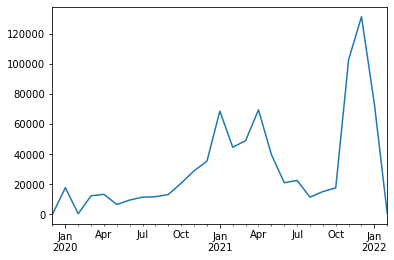

In [21]:
sample_month.value_counts().sort_index().plot()

This shows the month (x-axis) and how many RNA samples (y-axis) were sequenced and put into the NIH database. Activity increased in early 2021 and again in late 2021 potentially due to the discovery of the Omicron variant. 

## Identifying Sequences to Download for Further Analysis

Moving on from simply analyzing the metadata we'll first find key sequences good for further analysis. 

Some key sequences would be:

* The **reference** sequence, the first COVID genome that was fully sequenced 
* A **base** sequence, the first sequence for North America
* A **Delta Variant** sequence, a very common COVID variant
* An **Omicron Variant**, another common COVID variant 

Once identified these sequences will then need to be added to a new pandas DataFrame.

In [22]:
metadata[metadata["sequence_type"] == "RefSeq"]

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia


Let's take the value in the **nucleotide_accession** column and add it to a nucleotide ID list.

In [23]:
metadata[metadata["isolate_name"].str.contains("Delta").fillna(False)] #finding delta variant seqs

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
85804,OM108163.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-3/2021,29860,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-14,NaN,NaN,Asia
85948,OM061695.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-1/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-10,NaN,NaN,Asia
251375,OK091006.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,"SARS-CoV-2/human/JPN/SARS-CoV-2, B.1.617.2 lin...",29836,GenBank,complete,Asia; Japan,NaN,NaN,9606,2021-08-24,NaN,NaN,Asia
665095,OM108132.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-2/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-11,NaN,NaN,Asia


In [24]:
metadata[metadata["isolate_name"].str.contains("Omicron").fillna(False)] #finding omicron variant seqs

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
806923,OM095411.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Omicron-1/2021,29788,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-12-08,NaN,NaN,Asia


In [48]:
sequences = ["NC_045512.2", "OL467832.1", "OM061695.1", "OM095411.1"] #four sequences we'll use
human_names = ["reference", "base", "delta", "omicron"]

In [49]:
selected_sequences = metadata[metadata["nucleotide_accession"].isin(sequences)]

In [68]:
selected_sequences 

,nucleotide_accession,species_taxonomy_id,species_name,virus_genus,virus_family,isolate_name,nucleotide_length,sequence_type,nuc_completeness,geo_location,us_state,host_name,host_taxonomy_id,collection_date,bioproject,biosample,continent
0,NC_045512.2,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,Wuhan-Hu-1,29903,RefSeq,complete,Asia; China,NaN,NaN,9606,2019-12-01,PRJNA485481,NaN,Asia
85948,OM061695.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Delta-1/2021,29858,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-08-10,NaN,NaN,Asia
254609,OL467832.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/USA/hCoV_19_USA_ID_IVREF_6520...,29831,GenBank,complete,"North America; USA: Bingham, ID",NaN,NaN,9606,2020-01-01,NaN,NaN,North America
806923,OM095411.1,2697049,Severe acute respiratory syndrome coronavirus 2,Betacoronavirus,Coronaviridae,SARS-CoV-2/human/CHN/Omicron-1/2021,29788,GenBank,complete,Asia; China: Beijing,NaN,NaN,9606,2021-12-08,NaN,NaN,Asia


## Downloading the Sequences using Biopython

We'll use the Python library [Biopython](https://biopython.org/) which allows you to download RNA sequences and DNA sequences by accession number. Biopython contains a packaged called [**Entrez**](https://biopython.org/docs/1.75/api/Bio.Entrez.html) that retrieves records from the NIH, it requires an email input in order to keep record of the access and retreival of genomic data.

In [30]:
!pip install biopython

In [51]:
from Bio import Entrez
Entrez.email = "am.cornelious@gmail.com"

In [52]:
def download_sequence(id_code):
    handle = Entrez.esearch(db="nucleotide", term=id_code, retmax="1")
    record = Entrez.read(handle)
    handle = Entrez.efetch(db="nucleotide", id=record["IdList"][0], rettype="fasta", retmode="text")
    return handle.read()

In [53]:
sequence_data = {}
for sequence in sequences: 
    sequence_data[sequence] = {"fasta": download_sequence(sequence)}

In [54]:
sequence_data

{'NC_045512.2': {'fasta': '>NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome\nATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAA\nCGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATAATTAATAAC\nTAATTACTGTCGTTGACAGGACACGAGTAACTCGTCTATCTTCTGCAGGCTGCTTACGGTTTCGTCCGTG\nTTGCAGCCGATCATCAGCACATCTAGGTTTCGTCCGGGTGTGACCGAAAGGTAAGATGGAGAGCCTTGTC\nCCTGGTTTCAACGAGAAAACACACGTCCAACTCAGTTTGCCTGTTTTACAGGTTCGCGACGTGCTCGTAC\nGTGGCTTTGGAGACTCCGTGGAGGAGGTCTTATCAGAGGCACGTCAACATCTTAAAGATGGCACTTGTGG\nCTTAGTAGAAGTTGAAAAAGGCGTTTTGCCTCAACTTGAACAGCCCTATGTGTTCATCAAACGTTCGGAT\nGCTCGAACTGCACCTCATGGTCATGTTATGGTTGAGCTGGTAGCAGAACTCGAAGGCATTCAGTACGGTC\nGTAGTGGTGAGACACTTGGTGTCCTTGTCCCTCATGTGGGCGAAATACCAGTGGCTTACCGCAAGGTTCT\nTCTTCGTAAGAACGGTAATAAAGGAGCTGGTGGCCATAGTTACGGCGCCGATCTAAAGTCATTTGACTTA\nGGCGACGAGCTTGGCACTGATCCTTATGAAGATTTTCAAGAAAACTGGAACACTAAACATAGCAGTGGTG\nTTACCCGTGAACTCATGCGTGAGCTTAACGGAGGGGCATACACTCGCTATGTCGATAACAACTTCTGTGG\nCCCTGATGGCT

## Extracting the RNA Sequences

Let's parse the `sequence_data` from Fasta format to something we can easily work with for further analysis. 

In [56]:
from Bio import SeqIO
import io

for k,v in sequence_data.items():
    f = io.StringIO(v["fasta"])
    sequence_data[k]["parsed"] = list(SeqIO.parse(f, "fasta"))[0]

In [58]:
sequence_data["NC_045512.2"]["parsed"]

SeqRecord(seq=Seq('ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGT...AAA'), id='NC_045512.2', name='NC_045512.2', description='NC_045512.2 Severe acute respiratory syndrome coronavirus 2 isolate Wuhan-Hu-1, complete genome', dbxrefs=[])

 ## Aligning RNA Sequences

Now that the data is parsed in a readable format. Since we have the reference sequence (original) and multiple variants of it, let's align the sequences in relation to the number and succession of nucleotides to determine how the virus has mutated over time!

Over the course of multiple viral replications in the human body in continents around the world the COVID RNA sequence can mutate during the replication process. Some ways the sequence could have mutated over time are: 

   * **Deletion** - a nucleotide can be removed from the original reference sequence to the variant sequence.
   * **Substitution** - a nucleotide from the original reference can shift into the new sequence.
   * **Insertion** - a new nucleotide can be added to the variant sequence from the original reference sequence.
 
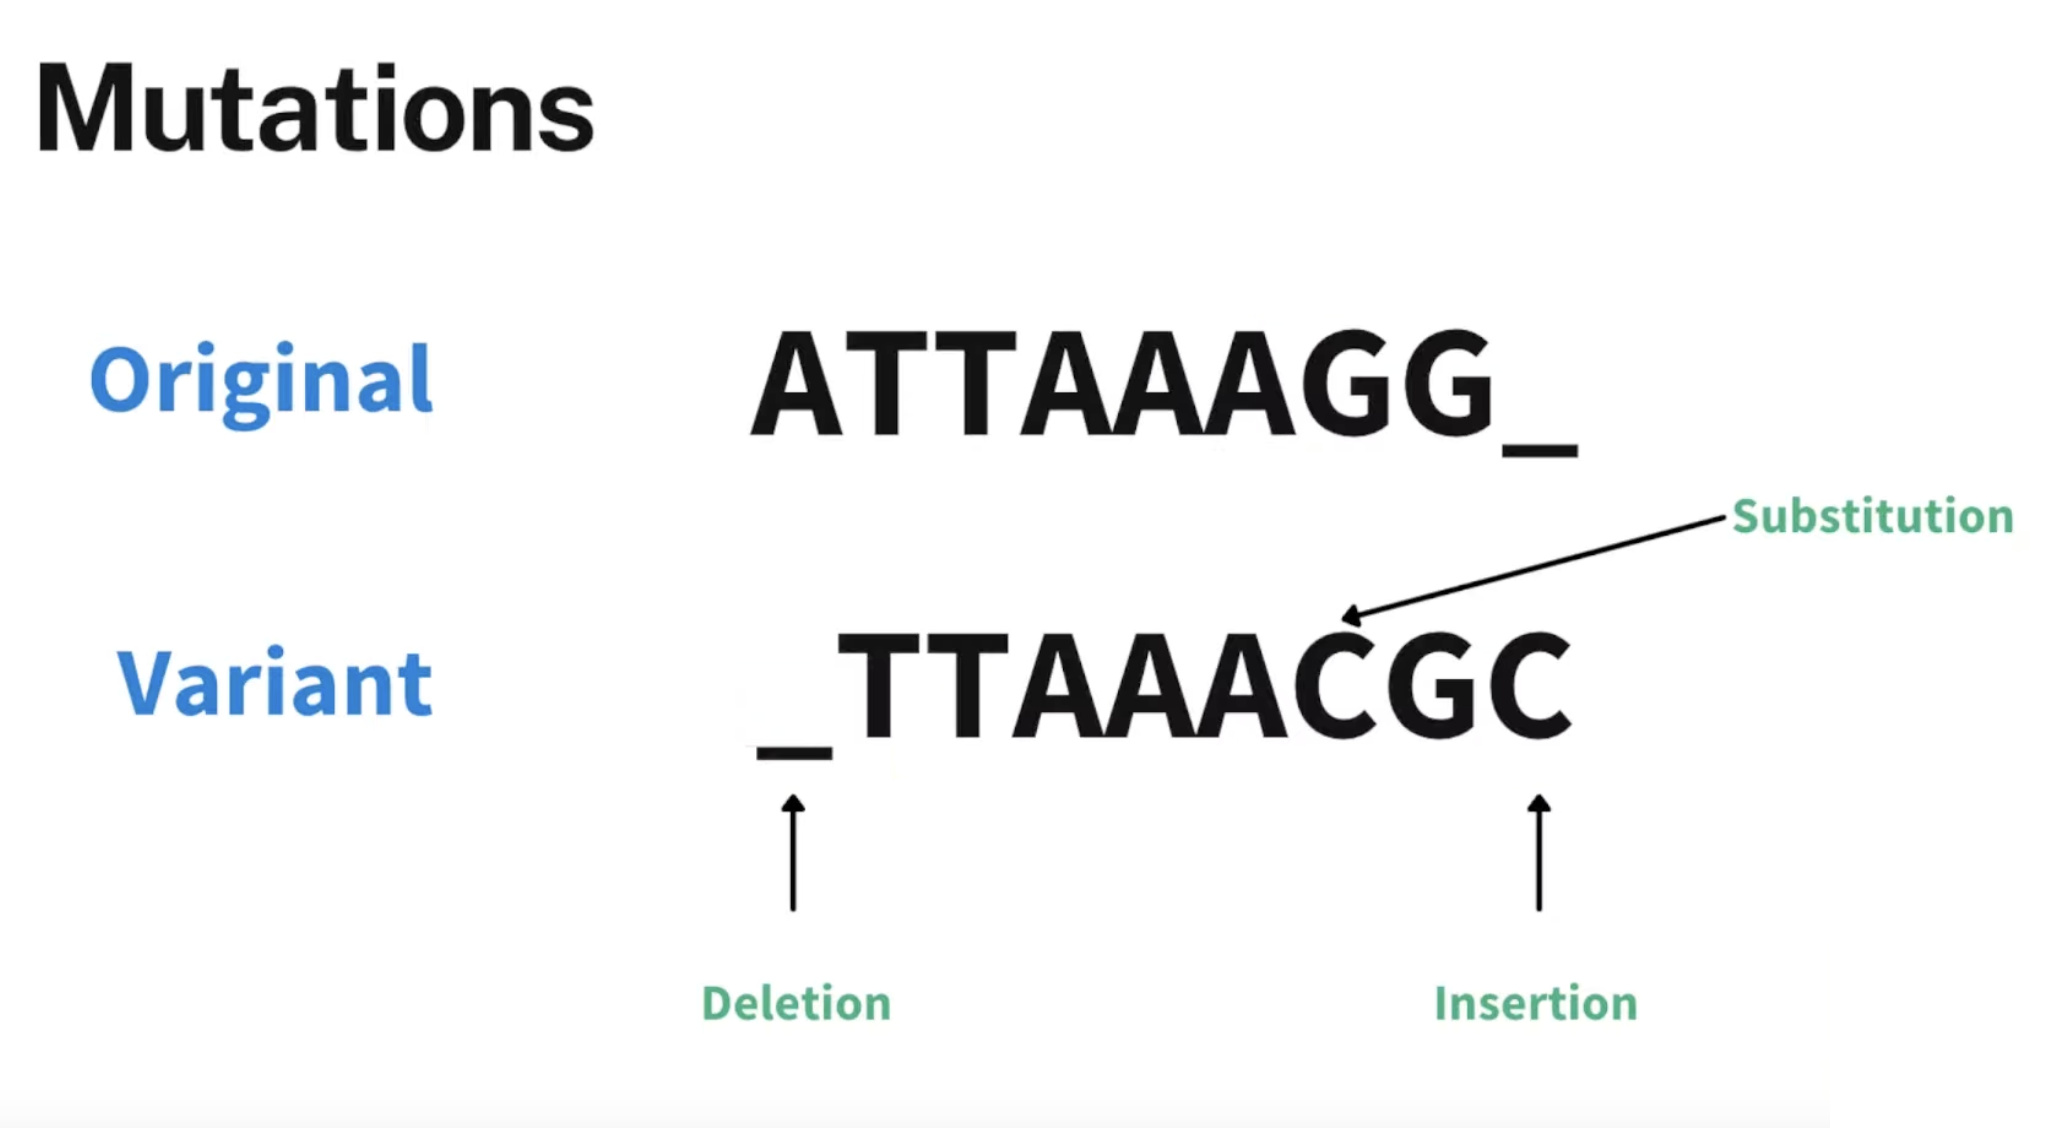
 
We'll need to determine which parts of two sequences align and which don't using an alignment algorithim in Biopython that will calculate the alignment score between sequences. 

In [59]:
from Bio import Align
aligner = Align.PairwiseAligner()

In [60]:
aligner.algorithm

'Needleman-Wunsch'

In [69]:
score = aligner.score(sequence_data["NC_045512.2"]["parsed"].seq,sequence_data["OL467832.1"]["parsed"].seq)

In [70]:
score

29820.0

The reference sequence **NC_045512.2** (China) and the base sequence **OL467832.1** (North America) have an alignment score of `29820.0` which is a score of how aligned the nucleotides are in relation to the length of the sequence.

In [71]:
len(sequence_data["OL467832.1"]["parsed"].seq)

29831

In [72]:
29818.0 / 29831

0.9995642117260568

Based on the alignment score and sequence these two sequences are 99% aligned. 

## Checking Alignment Across Variants

Now we can look at the alignment score between *all* of the sequences so we can extract insights from those scores.



In [73]:
import numpy as np

comparisons = np.zeros([4,4])

In [74]:
comparisons

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [75]:
for i in range(0,4):
    for j in range(0,i+1):
        score = aligner.score(sequence_data[sequences[i]]["parsed"].seq,sequence_data[sequences[j]]["parsed"].seq)
        comparisons[i,j] = score

In [80]:
comparisons_df = pd.DataFrame(comparisons, columns=human_names, index=human_names)

In [81]:
comparisons_df

,reference,base,delta,omicron
reference,29903.0,0.0,0.0,0.0
base,29820.0,29831.0,0.0,0.0
delta,29818.0,29775.0,29858.0,0.0
omicron,29725.0,29722.0,29688.0,29788.0


In [82]:
comparisons_df.iloc[:,0] / len(sequence_data["NC_045512.2"]["parsed"].seq)

reference    1.000000
base         0.997224
delta        0.997157
omicron      0.994047
Name: reference, dtype: float64

As time goes on the virus mutates as evidenced by the decreasing percentage overlap values as we bounce further and further away from the original sequence, but not by much. 

## Showing Sequence Mismatches 

Next we'll look at the exact mutation points between any two sequences. We'll use Biopython to find their overlaps and mutation points.

In [92]:
seq1 = sequence_data["NC_045512.2"]["parsed"].seq #base sequence
seq2 = sequence_data["OM061695.1"]["parsed"].seq #delta sequence

delta_alignments = aligner.align(seq1, seq2)

In [93]:
delta_alignments

In [94]:
delta_alignment = delta_alignments[0]

In [95]:
delta_alignment.shape

(2, 29943)

In [96]:
delta_alignment.aligned

array([[[    0,   209],
        [  210,   212],
        [  212,   240],
        [  241,  1047],
        [ 1048,  1273],
        [ 1274,  1276],
        [ 1276,  3036],
        [ 3037,  3038],
        [ 3038,  4180],
        [ 4181,  6401],
        [ 6402,  7123],
        [ 7123,  7124],
        [ 7125,  8985],
        [ 8986,  8989],
        [ 8989,  9052],
        [ 9053,  9054],
        [ 9054, 10028],
        [10028, 10029],
        [10030, 10506],
        [10507, 11116],
        [11117, 11200],
        [11201, 11331],
        [11332, 11333],
        [11333, 14407],
        [14408, 14409],
        [14409, 15450],
        [15450, 15451],
        [15452, 16465],
        [16466, 19219],
        [19220, 19221],
        [19221, 21617],
        [21618, 21986],
        [21987, 22028],
        [22029, 22030],
        [22033, 22035],
        [22037, 22916],
        [22917, 22918],
        [22918, 22994],
        [22995, 22996],
        [22996, 23402],
        [23403, 23603],
        [23604, 

In [104]:
seq1_end = None
seq2_end = None

for alignments in zip(delta_alignment.aligned[0], delta_alignment.aligned[1]):
    if seq1_end and seq2_end:
        seq1_mistmatch = seq1[seq1_end: alignments[0][0]]
        seq2_mistmatch = seq2[seq2_end: alignments[1][0]]
        print("1: {}".format(seq1_mistmatch))
        print("2: {}".format(seq2_mistmatch))
        
    seq1_end = alignments[0][1]
    seq2_end = alignments[1][1]

1: G
2: 
1: 
2: T
1: C
2: T
1: G
2: T
1: G
2: 
1: 
2: T
1: C
2: 
1: 
2: T
1: G
2: T
1: C
2: T
1: 
2: T
1: C
2: 
1: C
2: 
1: 
2: T
1: G
2: 
1: 
2: T
1: 
2: T
1: C
2: 
1: C
2: T
1: A
2: R
1: A
2: G
1: A
2: 
1: 
2: G
1: C
2: 
1: 
2: T
1: 
2: A
1: G
2: 
1: C
2: T
1: C
2: 
1: 
2: T
1: C
2: G
1: G
2: A
1: A
2: 
1: TTC
2: 
1: AG
2: 
1: T
2: 
1: 
2: G
1: C
2: 
1: 
2: A
1: A
2: G
1: C
2: G
1: G
2: 
1: 
2: A
1: G
2: 
1: 
2: T
1: G
2: 
1: 
2: T
1: C
2: T
1: T
2: 
1: 
2: C
1: T
2: 
1: 
2: C
1: C
2: T
1: 
2: C
1: T
2: 
1: C
2: T
1: C
2: 
1: 
2: T
1: G
2: 
1: TT
2: 
1: A
2: 
1: CT
2: 
1: A
2: 
1: A
2: G
1: 
2: T
1: G
2: 
1: 
2: T
1: G
2: 
1: G
2: T
1: G
2: T


Now we have an output of all of the mismatches. The code above can be improved to show you where they happen and what kind of mismatch they are. 

## Color Coding Mismatches

Improving upon the previous code we can use IPython to display the mutations in color coded format using HTML format.

* Deletions are represented in **Red** 
* Insertions are represented in **Green**
* Substitutions are represented in **Blue**

In [105]:
from IPython.display import HTML

In [106]:
def color_print(s, color="black"):
    return "<span style='color:{}'>{}</span>".format(color, s)

In [110]:
seq1_end = None
seq2_end = None
display_seq = []
for alignments in zip(delta_alignment.aligned[0], delta_alignment.aligned[1]):
    if seq1_end and seq2_end:
        seq1_mistmatch = seq1[seq1_end: alignments[0][0]]
        seq2_mistmatch = seq2[seq2_end: alignments[1][0]]
        if len(seq2_mistmatch) == 0:
            display_seq.append(color_print(seq1_mistmatch, "red"))
        elif len(seq1_mistmatch) == 0:
            display_seq.append(color_print(seq2_mistmatch, "green"))
        else: 
            display_seq.append(color_print(seq2_mistmatch, "blue"))

        
    display_seq.append(seq1[alignments[0][0]:alignments[0][1]])
        
    seq1_end = alignments[0][1]
    seq2_end = alignments[1][1]

In [111]:
display_seq = [str(i) for i in display_seq]

In [112]:
display(HTML('<br>'.join(display_seq)))

## Conclusion

Following the start of the COVID-19 pandemic various countries and their respective scientific institutions have provided a trove of genomic sequence data to be analyzed and used for the efforts to identify new COVID variants. Comparing RNA sequence length is a great way to identify how much the virus has mutated from its original sequence through various mutations like deletion, insertion and substitution of nucleotides. 

Further analysis can always be done to explore more specific questions regarding the spread and mutation of the COVID-19 virus: 

* Explore the chemical composition of the COVID RNA sequences and determine which proteins are encoded there and how they differ between the variants.

* Explore the mutation patterns of some other variants over time.

* Look at the most common insertion, deletion, and substitution sites to see which ones are changing most or least rapidly.
